Rainfall Prediction - Weather Forecasting
Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [290]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [291]:
#importing data from github file and converting into a DataFrame 
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
data.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [292]:
#displaying all the columns in the dataset
pd. set_option("display.max_columns", None)

#displaying all the rows in the dataset
pd.set_option("display.max_rows",None)

In [293]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [294]:
data.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
8420           E           31.0         SE        ENE          13.0   
8421         NNW           22.0         SE          N          13.0   
8422           N           37.0         SE        WNW           9.0   
8423          SE           28.0        SSE          N          13.0   
8424         NaN            NaN        ESE        ESE          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
8420       NaN       NaN     10.1     22.4        No           No  
8421       NaN       NaN     10.9     24.5        No           No  
8422       NaN       NaN     12.5     26.1        No           No  
8423       3.0       2.0     15.1     26.0        No           No  
8424       8.0       8.0     15.0     20.9        No          NaN

Initial observations from the dataset

1.The dataset has 23 columns

2.Both numerical and catagorical data are present in the dataset.

3.We can observe many columns having object(string) value in the dataset

4.Based on all the features we have to predict the whether or not it will rain tomorrow and how much rainfall could be there.

# Exploratory Data Analysis(EDA)

In [295]:
#finding number of rows and columns
data.shape

(8425, 23)

The dataset has 8425 rows and 23 columns

In [296]:
#finding the null values in each column
data.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

null values are present in almost every column, so we need to fill all the null values. lets analyse ways to fill the null values  

In [297]:
# lets check the number of unique values in each column
data.nunique().to_frame("Unique values")

Unique values
Date                    3004
Location                  12
MinTemp                  285
MaxTemp                  331
Rainfall                 250
Evaporation              116
Sunshine                 140
WindGustDir               16
WindGustSpeed             52
WindDir9am                16
WindDir3pm                16
WindSpeed9am              34
WindSpeed3pm              35
Humidity9am               90
Humidity3pm               94
Pressure9am              384
Pressure3pm              374
Cloud9am                   9
Cloud3pm                   9
Temp9am                  304
Temp3pm                  328
RainToday                  2
RainTomorrow               2

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

The dataset is consist of 16 columns having float datatype values and 7 columns having object datatype values.

In [299]:
#lets check names of all the column 
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [300]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

observations from the statistics of the data

1.The difference between the mean and standard deviation for  most of the features appears to be good except  Evaporation ,Sunshine,WindSpeed9am,WindSpeed3pm,Cloud9am and Cloud3pm where the difference does not appears to be adequate. In these cases the standard deviation is nearly 40 to 50% of the mean. Also in case of some features like Rainfall the standard deviation is greater than the mean.

2.many features have a min value of Zero in their distribution.

3.The difference between all the quantiles appears to be good enough for most of the features. but in case of some features like Rainfall and Pressure9am, the differnece does not appears to be adequate.

4.many columns have object data so only a limited number of columns are printed after using describe() method.

now, Lets fill the null values in all the columns using proper imputing techniques.

In [301]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [302]:
data.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Treating the null values with proper imputing techniques.

In [303]:


#imputing Evaporation feature null values
data['Evaporation'].fillna(data['Evaporation'].mode()[0], inplace=True)

In [304]:
#imputing Sunshine feature null values
data['Sunshine'].fillna(data['Sunshine'].mode()[0], inplace=True)

In [305]:
#imputing WindGustDir feature null values
data['WindGustDir'].fillna(data['WindGustDir'].mode()[0], inplace=True)

In [306]:
#imputing WindGustSpeed feature null values
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mode()[0], inplace=True)

In [307]:
#imputing WindDir9am feature null values
data['WindDir9am'].fillna(data['WindDir9am'].mode()[0], inplace=True)

In [308]:
#imputing WindDir3pm feature null values
data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0], inplace=True)

In [309]:
#imputing WindSpeed9am feature null values
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mode()[0], inplace=True)

In [310]:
#imputing WindSpeed3pm feature null values
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mode()[0], inplace=True)

In [311]:
#imputing Humidity9am feature null values
data['Humidity9am'].fillna(data['Humidity9am'].mode()[0], inplace=True)

In [312]:
#imputing Humidity3pm feature null values
data['Humidity3pm'].fillna(data['Humidity3pm'].mode()[0], inplace=True)

In [313]:
#imputing Pressure9am feature null values
data['Pressure9am'].fillna(data['Pressure9am'].mode()[0], inplace=True)

In [314]:
#imputing Pressure3pm feature null values
data['Pressure3pm'].fillna(data['Pressure3pm'].mode()[0], inplace=True)

In [315]:
#imputing Cloud9am feature null values
data['Cloud9am'].fillna(data['Cloud9am'].mode()[0], inplace=True)

In [316]:
#imputing Cloud3pm feature null values
data['Cloud3pm'].fillna(data['Cloud3pm'].mode()[0], inplace=True)

In [317]:
#imputing Temp9am feature null values
data['Temp9am'].fillna(data['Temp9am'].mode()[0], inplace=True)

In [318]:
#imputing Temp3pm feature null values
data['Temp3pm'].fillna(data['Temp3pm'].mode()[0], inplace=True)

In [319]:
#imputing RainToday feature null values
data['RainToday'].fillna(data['RainToday'].mode()[0], inplace=True)

In [320]:
# filling missing values in MinTemp using mean
data['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].mean())

In [321]:
# filling missing values in MaxTemp using mean
data['MaxTemp']=data['MaxTemp'].fillna(data['MaxTemp'].mean())

In [322]:
#imputing Rainfall feature null values
data['Rainfall'].fillna(data['Rainfall'].mode()[0], inplace=True)

In [323]:
#imputing RainTomorrow feature null values
data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0], inplace=True)

Lets check whether the null values are filled or not

In [324]:
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Now as all the null values are filled so lets encode the columns having object values to numerical values with the help of proper encoding technique.

In [325]:
data.shape

(8425, 23)

In [326]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          4.0       0.0   
1  2008-12-02   Albury      7.4     25.1       0.0          4.0       0.0   
2  2008-12-03   Albury     12.9     25.7       0.0          4.0       0.0   
3  2008-12-04   Albury      9.2     28.0       0.0          4.0       0.0   
4  2008-12-05   Albury     17.5     32.3       1.0          4.0       0.0   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       7.0   
2          26.0         38.0         30.0       1007.6       1008.7       7.0   
3           9.0         45.0         16.0       1017.6       1012.8       7.0   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       7.0     16.9     21.8        No           No  
1       7.0     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       7.0     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

Lets break the date column into three different columns

In [327]:
#breaking the column 'Date' into three different columns having month and year.
data['Date']=pd.to_datetime(data['Date'])
data['date_year']=data['Date'].dt.year
data['date_month']=data['Date'].dt.month
data['date_day']=data['Date'].dt.day



In [328]:
#lets drop the Date column as we have already broke it into three different columns
data=data.drop(['Date'],axis=1)
data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.0       0.0           W   
1   Albury      7.4     25.1       0.0          4.0       0.0         WNW   
2   Albury     12.9     25.7       0.0          4.0       0.0         WSW   
3   Albury      9.2     28.0       0.0          4.0       0.0          NE   
4   Albury     17.5     32.3       1.0          4.0       0.0           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       7.0   
1         44.0         25.0       1010.6       1007.8       7.0       7.0   
2         38.0         30.0       1007.6       1008.7       7.0       2.0   
3         45.0         16.0       1017.6       1012.8       7.0       7.0   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  date_year  date_month  date_day  
0     16.9     21.8        No           No       2008          12         1  
1     17.2     24.3        No           No       2008          12         2  
2     21.0     23.2        No           No       2008          12         3  
3     18.1     26.5        No           No       2008          12         4  
4     17.8     29.7        No           No       2008          12         5

lets split the dataset into numerical and catagorical columns

In [329]:
# now lets check for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'date_year', 'date_month', 'date_day']


In [330]:
len(numerical_col)

19

In [331]:
# lets check for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)



['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [332]:
len(categorical_col)

6

In [333]:
# lets check the number of unique values in each column
data.nunique().to_frame("Unique values")

Unique values
Location                  12
MinTemp                  286
MaxTemp                  332
Rainfall                 250
Evaporation              116
Sunshine                 140
WindGustDir               16
WindGustSpeed             52
WindDir9am                16
WindDir3pm                16
WindSpeed9am              34
WindSpeed3pm              35
Humidity9am               90
Humidity3pm               94
Pressure9am              384
Pressure3pm              374
Cloud9am                   9
Cloud3pm                   9
Temp9am                  304
Temp3pm                  328
RainToday                  2
RainTomorrow               2
date_year                 10
date_month                12
date_day                  31

In [334]:
# lets check the value counts of each type in each catagorical column
for d in data[categorical_col].columns:
        print(data[d].value_counts())
        print('-'*200)

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     4

Lets plot the value counts of each feature using Countplots

In [335]:
# lets check for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)



['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


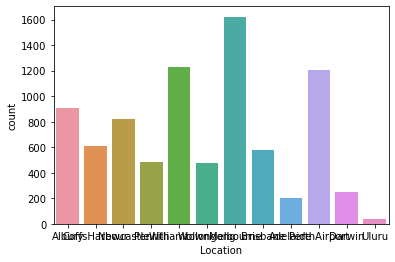

In [336]:
#lets plot the value counts for Location
sns.countplot(x='Location', data=data, )
plt.show()

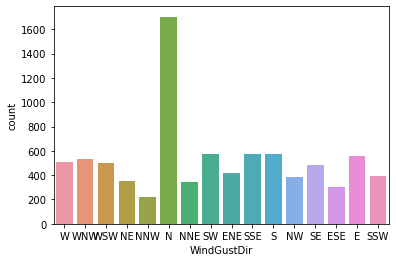

In [337]:
#lets plot the value counts for WindGustDir
sns.countplot(x='WindGustDir', data=data, )
plt.show()

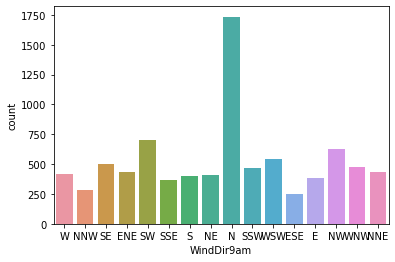

In [338]:
#lets plot the value counts for WindDir9am
sns.countplot(x='WindDir9am', data=data, )
plt.show()

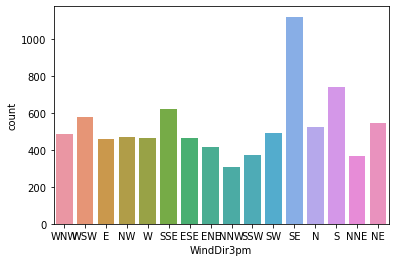

In [339]:
#lets plot the value counts for WindDir3pm
sns.countplot(x='WindDir3pm', data=data, )
plt.show()

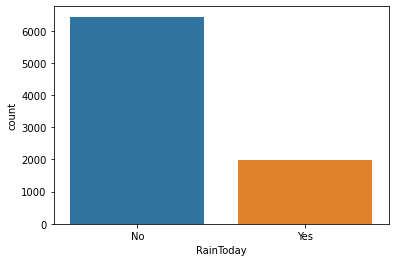

In [340]:
#lets plot the value counts for RainToday
sns.countplot(x='RainToday', data=data, )
plt.show()

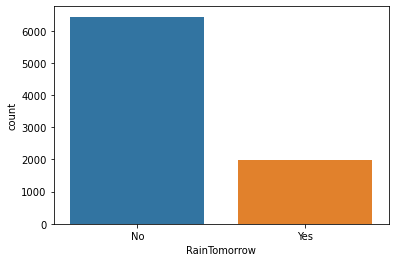

In [341]:
#lets plot the value counts for RainTomorrow
sns.countplot(x='RainTomorrow', data=data, )
plt.show()

In [342]:
print("number of catagorical columns are ", len(categorical_col))

number of catagorical columns are  6


Lets Encode the Catagorical columns with Object(string) values with LabelEncoder encoding technique.


In [343]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [344]:
#encoding the catagorical columns.
data[categorical_col]=data[categorical_col].apply(lab_enc.fit_transform)
data[categorical_col]



Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow
0            1           13          13          14          0             0
1            1           14           6          15          0             0
2            1           15          13          15          0             0
3            1            4           9           0          0             0
4            1           13           1           7          0             0
5            1           14          13          13          0             0
6            1           13          12          13          0             0
7            1           13          10          13          0             0
8            1            6           9           7          0             1
9            1           13           8          10          1             0
10           1            3          10           2          0             1
11           1            5           4           1          1             1
12           1           13           6           6          1             1
13           1           12          13          11          1             0
14           1            3           8          14          0             0
15           1           14           3          14          0             0
16           1            1          11           0          0             1
17           1           13           3          14          1             1
18           1           10          15          12          1             0
19           1           10           9           6          0             0
20           1            8           9           9          0             0
21           1            4           4           3          0             0
22           1           14          13          13          0             0
23           1            3           2           7          0             0
24           1           13           0          13          0             0
25           1           15           9          15          0             0
26           1           15           3          13          0             0
27           1           14           3          14          0             0
28           1           14           7          15          0             1
29           1           14          15          12          1             0
30           1           13          14          14          0             0
31           1           14          13          14          0             0
32           1           13          15          11          0             0
33           1           10          10           0          0             0
34           1           14          10           7          0             0
35           1           14           1           7          0             0
36           1           13           9          14          0             0
37           1           13           0          13          0             0
38           1           13          13          15          0             0
39           1            4          10           8          0             0
40           1            4           5           0          0             0
41           1            8          10           3          0             0
42           1           12           9          15          0             0
43           1            6           9           7          0             0
44           1            7          10          11          0             0
45           1           14          13          13          0             0
46           1           12          15          12          0             0
47           1            9           9          12          0             0
48           1           14           1          11          0             0
49           1           14          10           5          0             0
50           1            6          10          14          0             0
51

In [345]:
data.shape

(8425, 25)

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

In [347]:
data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6          4.0       0.0           13   
1         1      7.4     25.1       0.0          4.0       0.0           14   
2         1     12.9     25.7       0.0          4.0       0.0           15   
3         1      9.2     28.0       0.0          4.0       0.0            4   
4         1     17.5     32.3       1.0          4.0       0.0           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          13          14          20.0          24.0   
1           44.0           6          15           4.0          22.0   
2           46.0          13          15          19.0          26.0   
3           24.0           9           0          11.0           9.0   
4           41.0           1           7           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       7.0   
1         44.0         25.0       1010.6       1007.8       7.0       7.0   
2         38.0         30.0       1007.6       1008.7       7.0       2.0   
3         45.0         16.0       1017.6       1012.8       7.0       7.0   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  date_year  date_month  date_day  
0     16.9     21.8          0             0       2008          12         1  
1     17.2     24.3          0             0       2008          12         2  
2     21.0     23.2          0             0       2008          12         3  
3     18.1     26.5          0             0       2008          12         4  
4     17.8     29.7          0             0       2008          12         5

All the catagorical columns are encoded with numerical values now. So lets find out the typre of distribution of each feature.

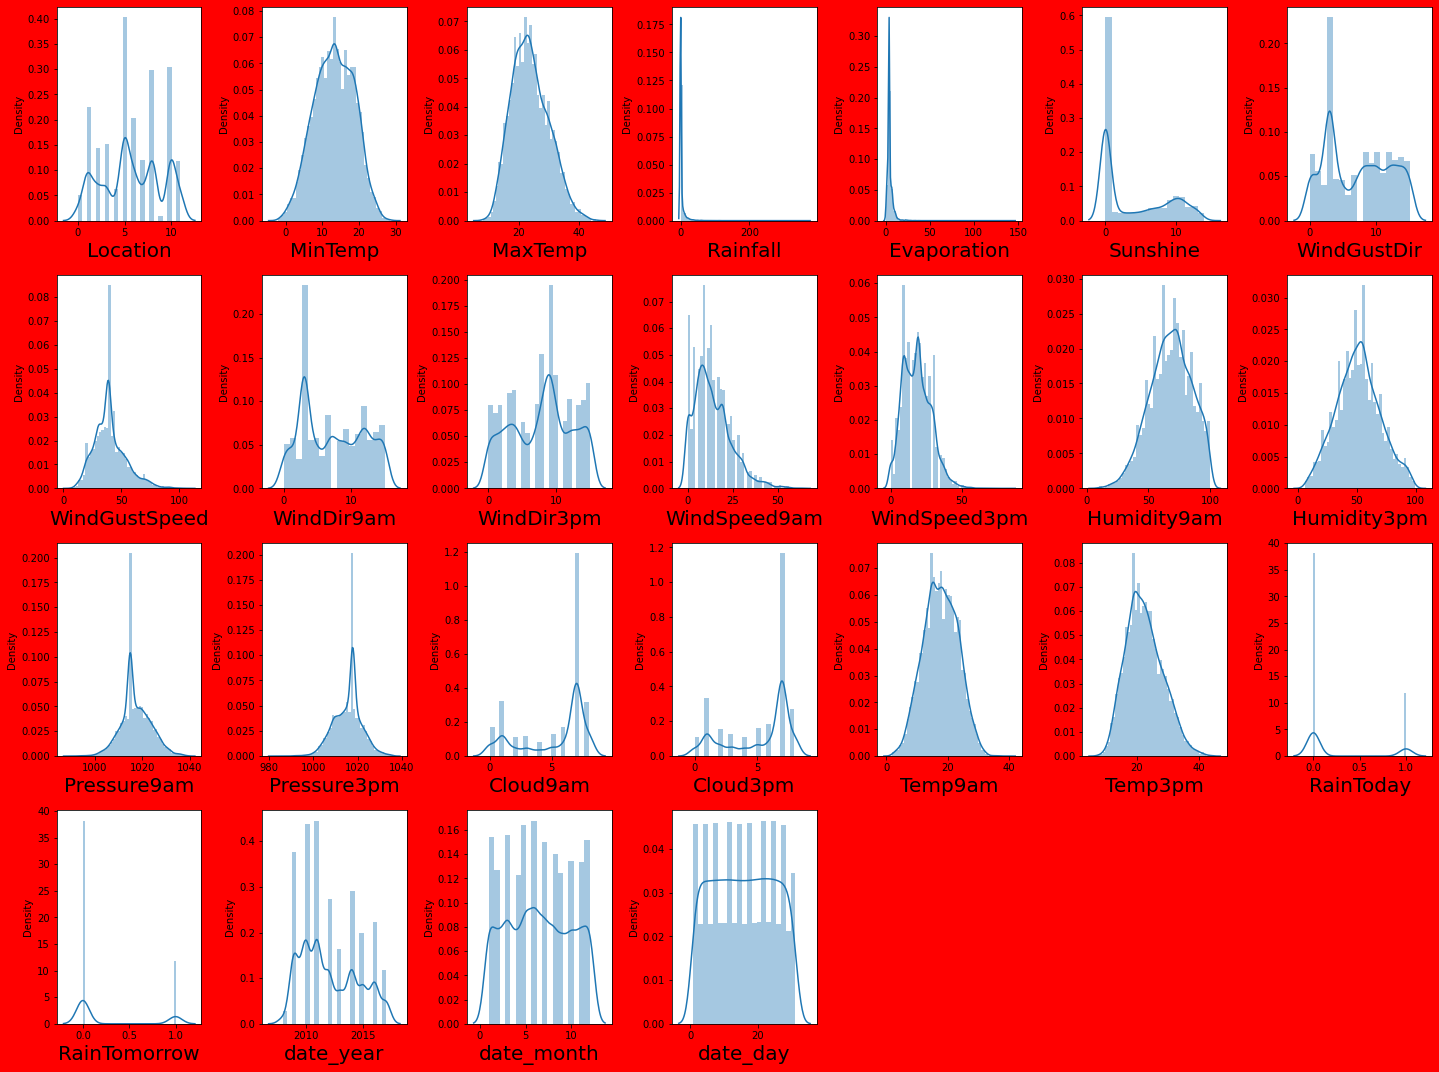

In [348]:
# now the data looks good and there is no missing values and Object values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=25:
        ax=plt.subplot(4,7,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Observations

1.most of the graphs look good and they show normal distribution(bell shaped curve).

2.We can also observe skewness in some of the graphs.

3.now lets check whether they have outliers in the distribution by plotting box plots.

# prediction of whether or not it will rain tomorrow.

In [349]:
#checking for outliers in all the features
df_features=data.drop('RainTomorrow', axis=1)

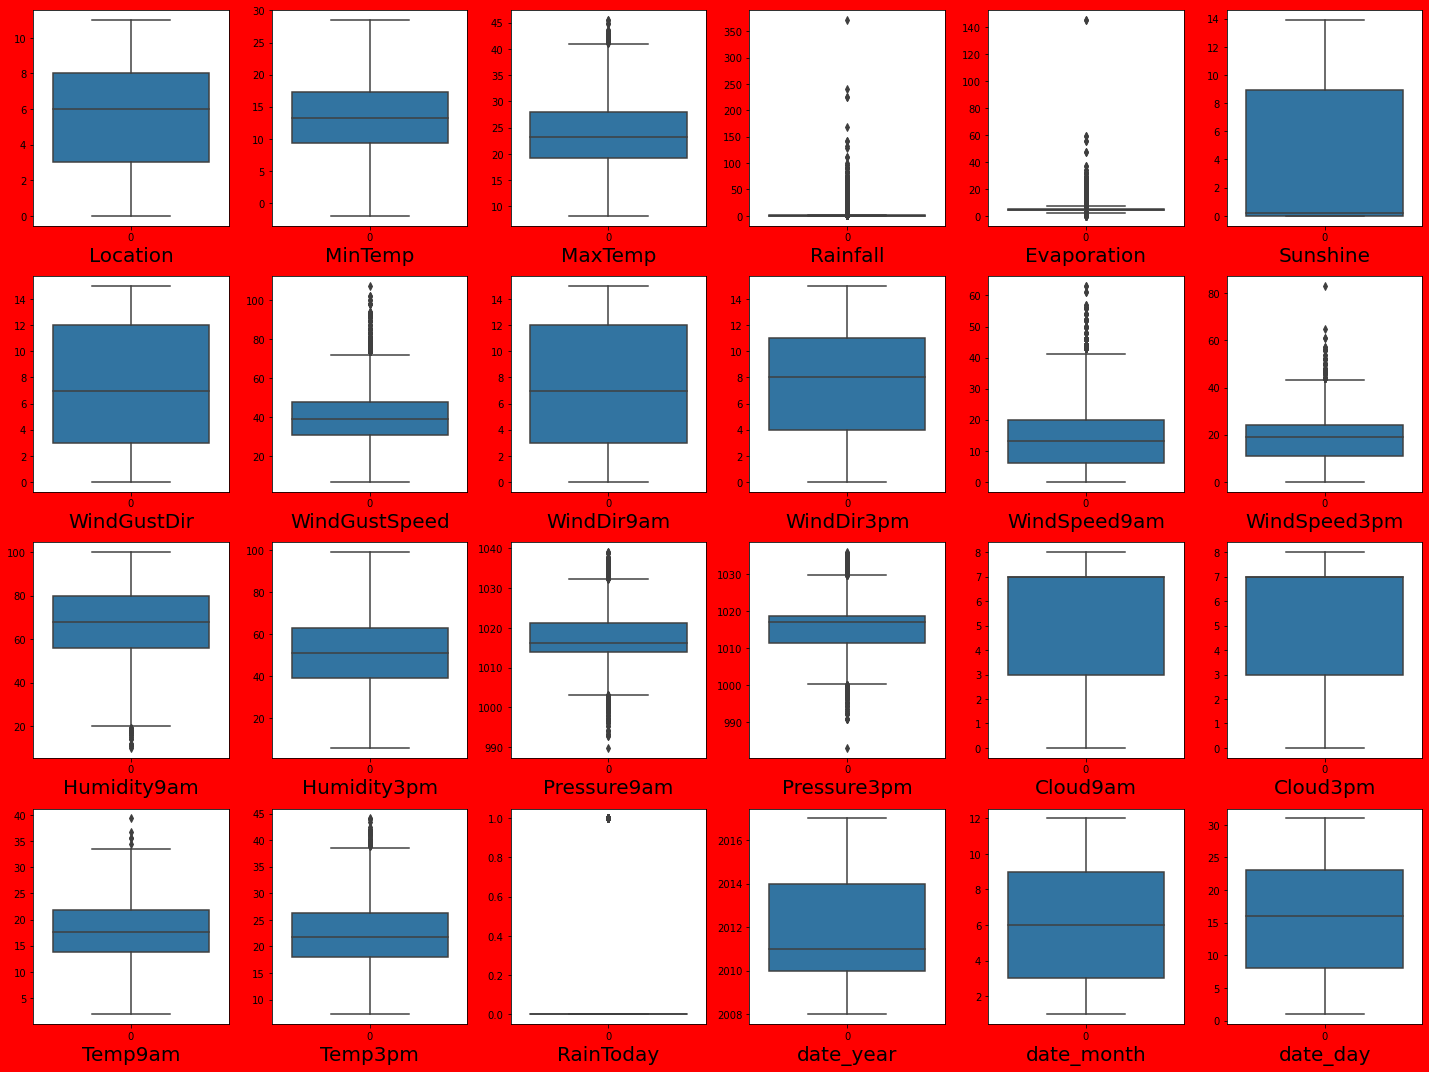

In [350]:
# checking for the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=24:
        plt.subplot(4,6,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [351]:
#finding the corelation between the features in the data set
data.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.116531  0.064268  0.005801     0.120376 -0.093480   
MinTemp        0.116531  1.000000  0.717522  0.085723     0.267110  0.135377   
MaxTemp        0.064268  0.717522  1.000000 -0.087710     0.327657  0.286542   
Rainfall       0.005801  0.085723 -0.087710  1.000000     0.016758 -0.087678   
Evaporation    0.120376  0.267110  0.327657  0.016758     1.000000  0.205342   
Sunshine      -0.093480  0.135377  0.286542 -0.087678     0.205342  1.000000   
WindGustDir   -0.035408 -0.145316 -0.224670  0.037106    -0.069158 -0.055204   
WindGustSpeed  0.230018  0.230214  0.139864  0.082628     0.155317  0.082179   
WindDir9am    -0.027103 -0.041650 -0.214119  0.093072    -0.049889 -0.013584   
WindDir3pm    -0.027736 -0.147166 -0.180622  0.038153    -0.048284 -0.062728   
WindSpeed9am   0.219237  0.135731  0.011975  0.048278     0.150837  0.213718   
WindSpeed3pm   0.228392  0.180570  0.088478  0.022739     0.136948  0.175902   
Humidity9am    0.006195 -0.130596 -0.390751  0.227291    -0.250417 -0.381333   
Humidity3pm    0.056114  0.078146 -0.422290  0.234625    -0.175275 -0.314459   
Pressure9am   -0.044545 -0.412601 -0.317919 -0.069093    -0.159492  0.056912   
Pressure3pm   -0.009161 -0.428494 -0.402011 -0.030634    -0.199197 -0.086103   
Cloud9am       0.033864  0.017254 -0.242183  0.133553    -0.105066 -0.574466   
Cloud3pm       0.008465 -0.038395 -0.242127  0.101161    -0.133774 -0.545069   
Temp9am        0.117040  0.886136  0.865080 -0.007002     0.323197  0.267029   
Temp3pm        0.059716  0.686732  0.974153 -0.089931     0.318913  0.288894   
RainToday      0.003071  0.064789 -0.224883  0.464941    -0.090804 -0.144715   
RainTomorrow   0.002824  0.092942 -0.152886  0.219015    -0.060386 -0.197937   
date_year      0.486405  0.044123  0.119772  0.004491     0.109725 -0.265601   
date_month    -0.082407 -0.245854 -0.163253 -0.016258     0.018540  0.019281   
date_day      -0.002019  0.009446  0.015608 -0.013029     0.016783  0.007805   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Location         -0.035408       0.230018   -0.027103   -0.027736   
MinTemp          -0.145316       0.230214   -0.041650   -0.147166   
MaxTemp          -0.224670       0.139864   -0.214119   -0.180622   
Rainfall          0.037106       0.082628    0.093072    0.038153   
Evaporation      -0.069158       0.155317   -0.049889   -0.048284   
Sunshine         -0.055204       0.082179   -0.013584   -0.062728   
WindGustDir       1.000000       0.025577    0.403562    0.505799   
WindGustSpeed     0.025577       1.000000   -0.068545    0.070677   
WindDir9am        0.403562      -0.068545    1.000000    0.249527   
WindDir3pm        0.505799       0.070677    0.249527    1.000000   
WindSpeed9am      0.028300       0.605502    0.058228    0.025852   
WindSpeed3pm      0.104366       0.636197    0.053519    0.065056   
Humidity9am       0.034875      -0.271896    0.023737   -0.010034   
Humidity3pm       0.051377      -0.093647    0.123157   -0.011498   
Pressure9am      -0.071336      -0.382116    0.010892   -0.135785   
Pressure3pm      -0.058467      -0.385564    0.052802   -0.042155   
Cloud9am          0.164227      -0.004122    0.098501    0.087079   
Cloud3pm          0.127633       0.031616    0.066539    0.062069   
Temp9am          -0.173622       0.202291   -0.099944   -0.165367   
Temp3pm          -0.233015       0.102218   -0.217929   -0.195979   
RainToday         0.125188       0.076890    0.157324    0.100125   
RainTomorrow      0.051832       0.190274    0.032860    0.008918   
date_year        -0.088340      -0.049612   -0.014498   -0.005812   
date_month        0.034823       0.051063    0.012544    0.029384   
date_day          0.015683      -0.002454   -0.015154    0.003089   

               WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
Location           0.219237      0.228392     0.006195     0.056114 

In [352]:
#sorting the correlation values of Chu with all the columns
data.corr()['RainTomorrow'].sort_values()

Sunshine        -0.197937
Temp3pm         -0.192463
Pressure9am     -0.162406
MaxTemp         -0.152886
Pressure3pm     -0.133191
Evaporation     -0.060386
Temp9am         -0.023597
date_day        -0.015461
date_year       -0.011066
date_month      -0.001243
Location         0.002824
WindDir3pm       0.008918
WindDir9am       0.032860
WindGustDir      0.051832
WindSpeed3pm     0.055508
WindSpeed9am     0.067943
MinTemp          0.092942
WindGustSpeed    0.190274
Cloud9am         0.216294
Rainfall         0.219015
Cloud3pm         0.261159
Humidity9am      0.271396
RainToday        0.312929
Humidity3pm      0.444347
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

We can observe that no feature is strongly corelated with the label(RainTomorrow). To get amore clear view lets plot the heatmap.

<AxesSubplot:>

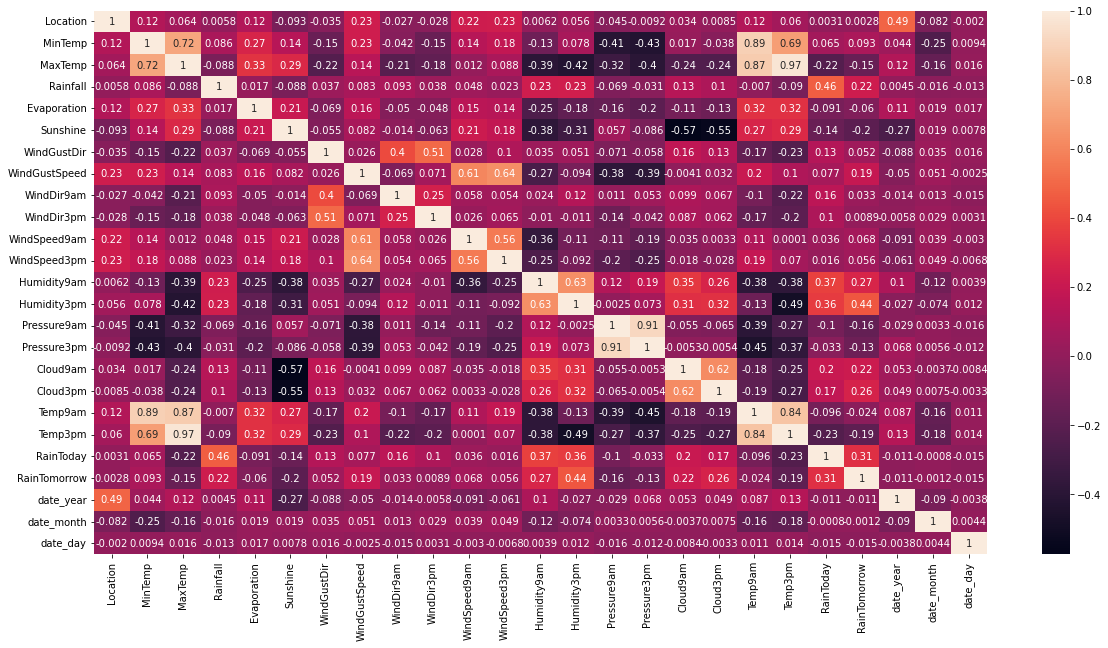

In [353]:
#now lets find out the co relation among the features(multicolinearity) using heatmap plot.
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

we can observe that some features are strongly corealted with other features. This is called  multicolinearity. we will find out the vif scores for all the featues for further analysis.

In [354]:
#Lets plot some more graphs to have a better understanding of the data 
#correlation between the features and labels

y=data['RainTomorrow']
x=data.drop(columns=['RainTomorrow'])

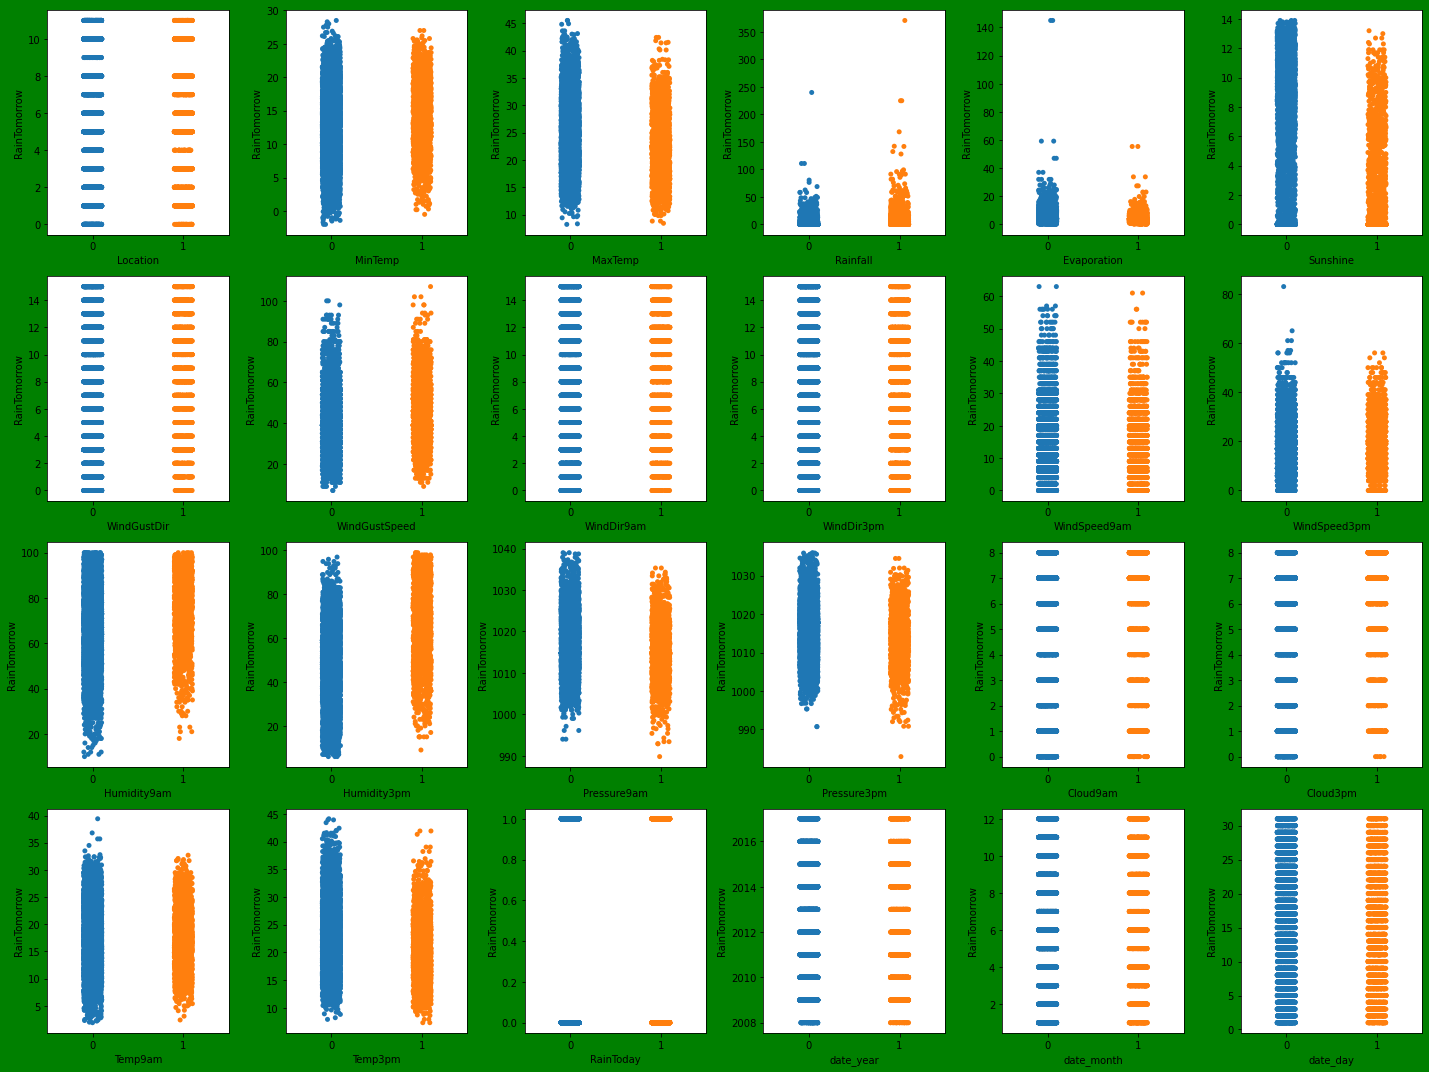

In [355]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=24:
        ax=plt.subplot(4,6,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('RainTomorrow',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

The trend is not clear here, so lets plot the regplot for a better view of the trend in relationship between the features and the label.

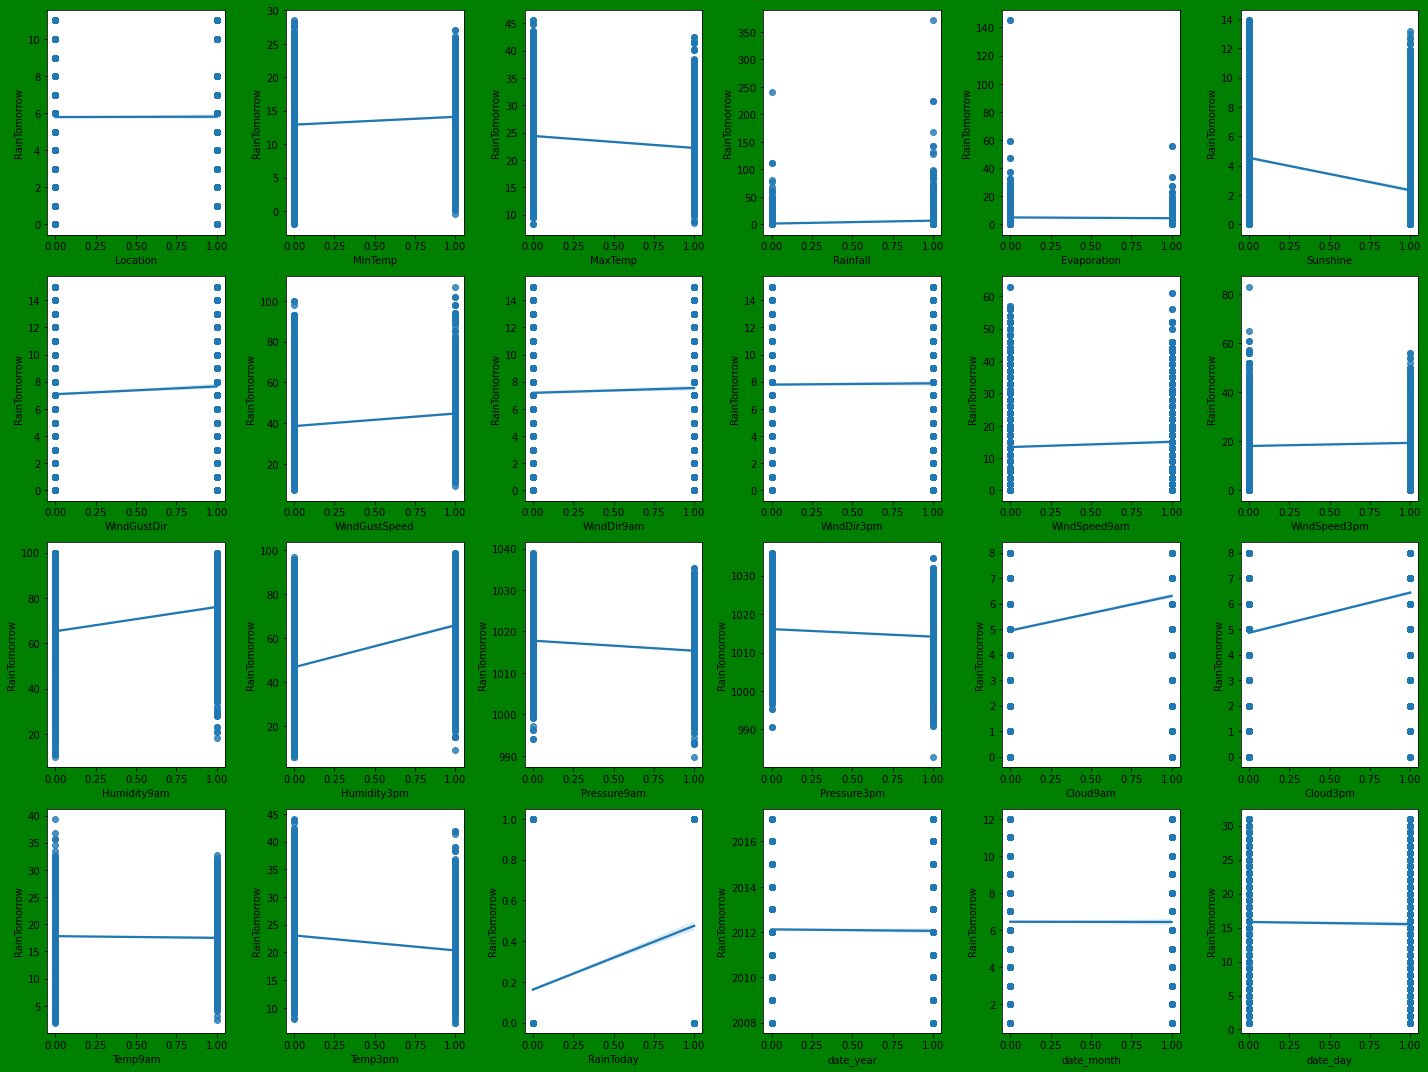

In [356]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=24:
        ax=plt.subplot(4,6,plotnumber)
        sns.regplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('RainTomorrow',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

In [357]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [358]:
x_scaled.shape[1]

24

In [359]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns

vif

VIF       Features
0    1.551372       Location
1    8.364487        MinTemp
2   26.016499        MaxTemp
3    1.314658       Rainfall
4    1.213876    Evaporation
5    2.224847       Sunshine
6    1.633115    WindGustDir
7    2.500363  WindGustSpeed
8    1.331073     WindDir9am
9    1.491563     WindDir3pm
10   2.213630   WindSpeed9am
11   1.999291   WindSpeed3pm
12   3.975162    Humidity9am
13   5.539326    Humidity3pm
14   8.982792    Pressure9am
15   8.882970    Pressure3pm
16   2.157750       Cloud9am
17   1.897462       Cloud3pm
18  17.513338        Temp9am
19  33.185622        Temp3pm
20   1.577766      RainToday
21   1.692944      date_year
22   1.154140     date_month
23   1.004022       date_day

Now as the label has  catagorical data  so this is a Classification problem. We will be building some classification algorithms for this problem and we will find out the best machine learning model among them.

# Building classification models for RainTomorrow

In [360]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=700)
y_train.head()


4978    0
8013    0
1522    0
2086    0
3489    0
Name: RainTomorrow, dtype: int32

In [361]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [362]:
lr=LogisticRegression() 
knn=KNeighborsClassifier() 
dtc=DecisionTreeClassifier() 
rfc=RandomForestClassifier()   
svm=SVC()                 

In [363]:
models = [lr, knn, dtc, svm, rfc]
for m in models:
    print (m)
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print (accuracy_score(y_test, y_pred))
    print (confusion_matrix(y_test, y_pred))
    print (classification_report(y_test, y_pred))

LogisticRegression()
0.8248694826767916
[[1491  119]
 [ 250  247]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1610
           1       0.67      0.50      0.57       497

    accuracy                           0.82      2107
   macro avg       0.77      0.71      0.73      2107
weighted avg       0.81      0.82      0.82      2107

KNeighborsClassifier()
0.8258186995728524
[[1497  113]
 [ 254  243]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1610
           1       0.68      0.49      0.57       497

    accuracy                           0.83      2107
   macro avg       0.77      0.71      0.73      2107
weighted avg       0.81      0.83      0.82      2107

DecisionTreeClassifier()
0.8528713811105838
[[1452  158]
 [ 152  345]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1610
           1       0.69      0

In [364]:
# Cross validation scores for all models

for m in models:
    c_v= cross_val_score(m, x_scaled, y, cv = 10)
    print ('Cross Validation Score for ',m, ' is :', c_v.mean())
    print (' ')


Cross Validation Score for  LogisticRegression()  is : 0.8185216805718746
 
Cross Validation Score for  KNeighborsClassifier()  is : 0.8111645999047628
 
Cross Validation Score for  DecisionTreeClassifier()  is : 0.8400147364209376
 
Cross Validation Score for  SVC()  is : 0.8333555929366616
 
Cross Validation Score for  RandomForestClassifier()  is : 0.899714851663694
 


now lets plot the ROC AUC curve to know about the best fitted model.

In [365]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

print(roc_auc_score(y_test,lr.predict(x_test)))
print(roc_auc_score(y_test,knn.predict(x_test)))
print(roc_auc_score(y_test,dtc.predict(x_test)))
print(roc_auc_score(y_test,rfc.predict(x_test)))
print(roc_auc_score(y_test,svm.predict(x_test)))

0.7115344239349138
0.7093736331029656
0.7980141719884526
0.8128247747353687
0.7319307147231213


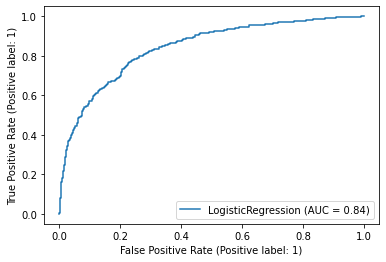

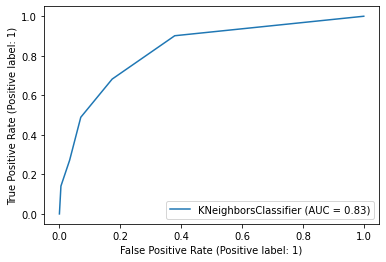

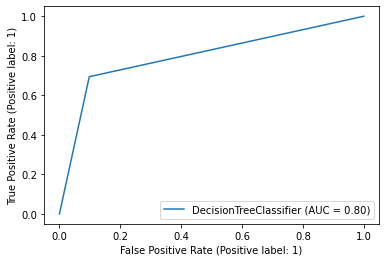

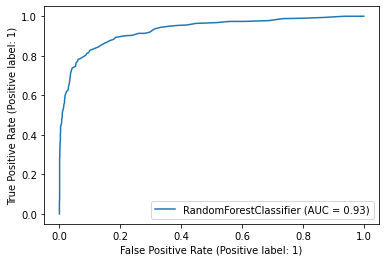

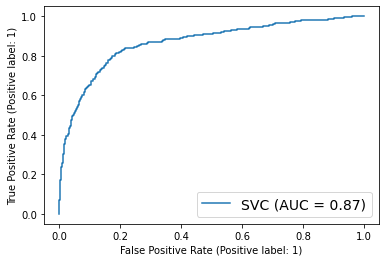

In [366]:
#plotting RocAuc curve
plot_roc_curve(lr,x_test,y_test)  
plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(svm,x_test,y_test)
plt.legend(prop = {'size':14}, loc ='lower right')

We have concluded that the RandomForestClassifier() model is the best model based on the accuracy,Cross validation and AUC scores among all the models. So now lets use RandomForestClassifier() for further analysis and lets check whether we can improve the accuracy of the model by using Hyperparameter tuning using GridSearchCV.

# Hyperparameter Tuning using GridSearchCV

In [373]:
rfc=RandomForestClassifier(max_features='auto', min_samples_leaf=2,n_estimators=80,criterion='entropy')

In [374]:
rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_estimators=80)

In [375]:
data.tail()

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
8420         9      2.8  23.400000       0.0          4.0       0.0   
8421         9      3.6  25.300000       0.0          4.0       0.0   
8422         9      5.4  26.900000       0.0          4.0       0.0   
8423         9      7.8  27.000000       0.0          4.0       0.0   
8424         9     14.9  23.859976       0.0          4.0       0.0   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
8420            0           31.0           9           1          13.0   
8421            6           22.0           9           3          13.0   
8422            3           37.0           9          14           9.0   
8423            9           28.0          10           3          13.0   
8424            3           39.0           2           2          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
8420       7.0       7.0     10.1     22.4          0             0   
8421       7.0       7.0     10.9     24.5          0             0   
8422       7.0       7.0     12.5     26.1          0             0   
8423       3.0       2.0     15.1     26.0          0             0   
8424       8.0       8.0     15.0     20.9          0             0   

      date_year  date_month  date_day  
8420       2017           6        21  
8421       2017           6        22  
8422       2017           6        23  
8423       2017           6        24  
8424       2017           6        25

In [376]:
#prediction of will rain happen tomorrow 
print(' will rain happen tomorrow ', rfc.predict(scalar.transform([[9,2.8,23.400000,0.0,4.0,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,2017,6,21]])))

 will rain happen tomorrow  [0]


In [377]:
y_pred=rfc.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [378]:
#printing the confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[1564,   46],
       [ 180,  317]], dtype=int64)

In [379]:
#printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1610
           1       0.87      0.64      0.74       497

    accuracy                           0.89      2107
   macro avg       0.89      0.80      0.83      2107
weighted avg       0.89      0.89      0.89      2107



Accuracy has not increased after using hyperparameter tuning

In [380]:
#plotting Auc roc curve
print(roc_auc_score(y_test,rfc.predict(x_test)))

0.8046277665995976


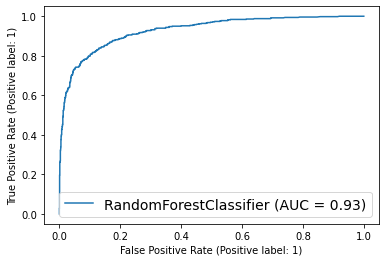

In [381]:
plot_roc_curve(rfc,x_test,y_test)
plt.legend(prop = {'size':14}, loc ='lower right')

In [382]:
#cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(rfc,x_scaled,y,cv=10)

array([0.85172005, 0.85172005, 0.79478055, 0.90035587, 0.99288256,
       0.99643705, 0.99287411, 0.88836105, 0.86342043, 0.86104513])

In [383]:
cross_val_score(RandomForestClassifier(),x_scaled,y,cv=10).mean()

0.8967460122906822

In [384]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle10'
pickle.dump(rfc,open('finalized_model.pickle11','wb'))

# prediction of how much rainfall could be there.

In [386]:
#Lets plot some more graphs to have a better understanding of the data 
#correlation between the features and labels

y=data['Rainfall']
x=data.drop(columns=['Rainfall'])

In [387]:
#finding the corelation between the features in the data set
data.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.116531  0.064268  0.005801     0.120376 -0.093480   
MinTemp        0.116531  1.000000  0.717522  0.085723     0.267110  0.135377   
MaxTemp        0.064268  0.717522  1.000000 -0.087710     0.327657  0.286542   
Rainfall       0.005801  0.085723 -0.087710  1.000000     0.016758 -0.087678   
Evaporation    0.120376  0.267110  0.327657  0.016758     1.000000  0.205342   
Sunshine      -0.093480  0.135377  0.286542 -0.087678     0.205342  1.000000   
WindGustDir   -0.035408 -0.145316 -0.224670  0.037106    -0.069158 -0.055204   
WindGustSpeed  0.230018  0.230214  0.139864  0.082628     0.155317  0.082179   
WindDir9am    -0.027103 -0.041650 -0.214119  0.093072    -0.049889 -0.013584   
WindDir3pm    -0.027736 -0.147166 -0.180622  0.038153    -0.048284 -0.062728   
WindSpeed9am   0.219237  0.135731  0.011975  0.048278     0.150837  0.213718   
WindSpeed3pm   0.228392  0.180570  0.088478  0.022739     0.136948  0.175902   
Humidity9am    0.006195 -0.130596 -0.390751  0.227291    -0.250417 -0.381333   
Humidity3pm    0.056114  0.078146 -0.422290  0.234625    -0.175275 -0.314459   
Pressure9am   -0.044545 -0.412601 -0.317919 -0.069093    -0.159492  0.056912   
Pressure3pm   -0.009161 -0.428494 -0.402011 -0.030634    -0.199197 -0.086103   
Cloud9am       0.033864  0.017254 -0.242183  0.133553    -0.105066 -0.574466   
Cloud3pm       0.008465 -0.038395 -0.242127  0.101161    -0.133774 -0.545069   
Temp9am        0.117040  0.886136  0.865080 -0.007002     0.323197  0.267029   
Temp3pm        0.059716  0.686732  0.974153 -0.089931     0.318913  0.288894   
RainToday      0.003071  0.064789 -0.224883  0.464941    -0.090804 -0.144715   
RainTomorrow   0.002824  0.092942 -0.152886  0.219015    -0.060386 -0.197937   
date_year      0.486405  0.044123  0.119772  0.004491     0.109725 -0.265601   
date_month    -0.082407 -0.245854 -0.163253 -0.016258     0.018540  0.019281   
date_day      -0.002019  0.009446  0.015608 -0.013029     0.016783  0.007805   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Location         -0.035408       0.230018   -0.027103   -0.027736   
MinTemp          -0.145316       0.230214   -0.041650   -0.147166   
MaxTemp          -0.224670       0.139864   -0.214119   -0.180622   
Rainfall          0.037106       0.082628    0.093072    0.038153   
Evaporation      -0.069158       0.155317   -0.049889   -0.048284   
Sunshine         -0.055204       0.082179   -0.013584   -0.062728   
WindGustDir       1.000000       0.025577    0.403562    0.505799   
WindGustSpeed     0.025577       1.000000   -0.068545    0.070677   
WindDir9am        0.403562      -0.068545    1.000000    0.249527   
WindDir3pm        0.505799       0.070677    0.249527    1.000000   
WindSpeed9am      0.028300       0.605502    0.058228    0.025852   
WindSpeed3pm      0.104366       0.636197    0.053519    0.065056   
Humidity9am       0.034875      -0.271896    0.023737   -0.010034   
Humidity3pm       0.051377      -0.093647    0.123157   -0.011498   
Pressure9am      -0.071336      -0.382116    0.010892   -0.135785   
Pressure3pm      -0.058467      -0.385564    0.052802   -0.042155   
Cloud9am          0.164227      -0.004122    0.098501    0.087079   
Cloud3pm          0.127633       0.031616    0.066539    0.062069   
Temp9am          -0.173622       0.202291   -0.099944   -0.165367   
Temp3pm          -0.233015       0.102218   -0.217929   -0.195979   
RainToday         0.125188       0.076890    0.157324    0.100125   
RainTomorrow      0.051832       0.190274    0.032860    0.008918   
date_year        -0.088340      -0.049612   -0.014498   -0.005812   
date_month        0.034823       0.051063    0.012544    0.029384   
date_day          0.015683      -0.002454   -0.015154    0.003089   

               WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
Location           0.219237      0.228392     0.006195     0.056114 

In [388]:
#sorting the correlation values of Price with all the columns
data.corr()['Rainfall'].sort_values()

Temp3pm         -0.089931
MaxTemp         -0.087710
Sunshine        -0.087678
Pressure9am     -0.069093
Pressure3pm     -0.030634
date_month      -0.016258
date_day        -0.013029
Temp9am         -0.007002
date_year        0.004491
Location         0.005801
Evaporation      0.016758
WindSpeed3pm     0.022739
WindGustDir      0.037106
WindDir3pm       0.038153
WindSpeed9am     0.048278
WindGustSpeed    0.082628
MinTemp          0.085723
WindDir9am       0.093072
Cloud3pm         0.101161
Cloud9am         0.133553
RainTomorrow     0.219015
Humidity9am      0.227291
Humidity3pm      0.234625
RainToday        0.464941
Rainfall         1.000000
Name: Rainfall, dtype: float64

We can observe that no feature is strongly corelated with the label.To get a more clear view lets plot the heatmap

<AxesSubplot:>

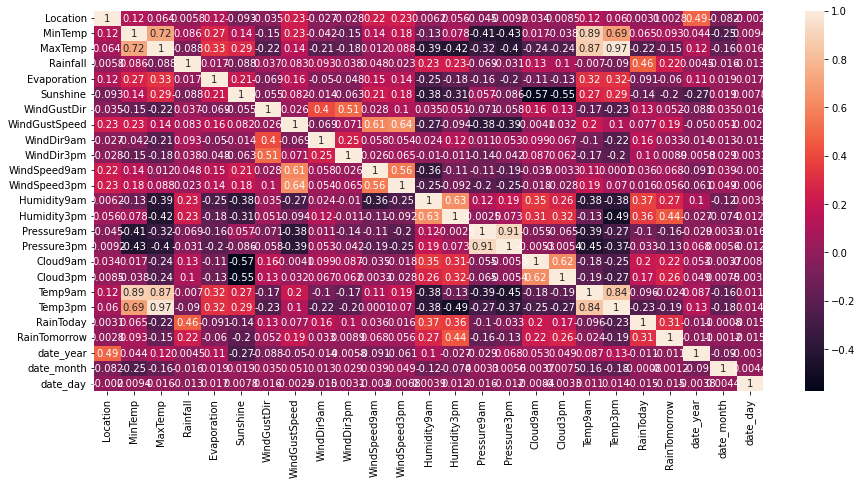

In [389]:
#now lets find out the corelation among the feature(multicolinearity) using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

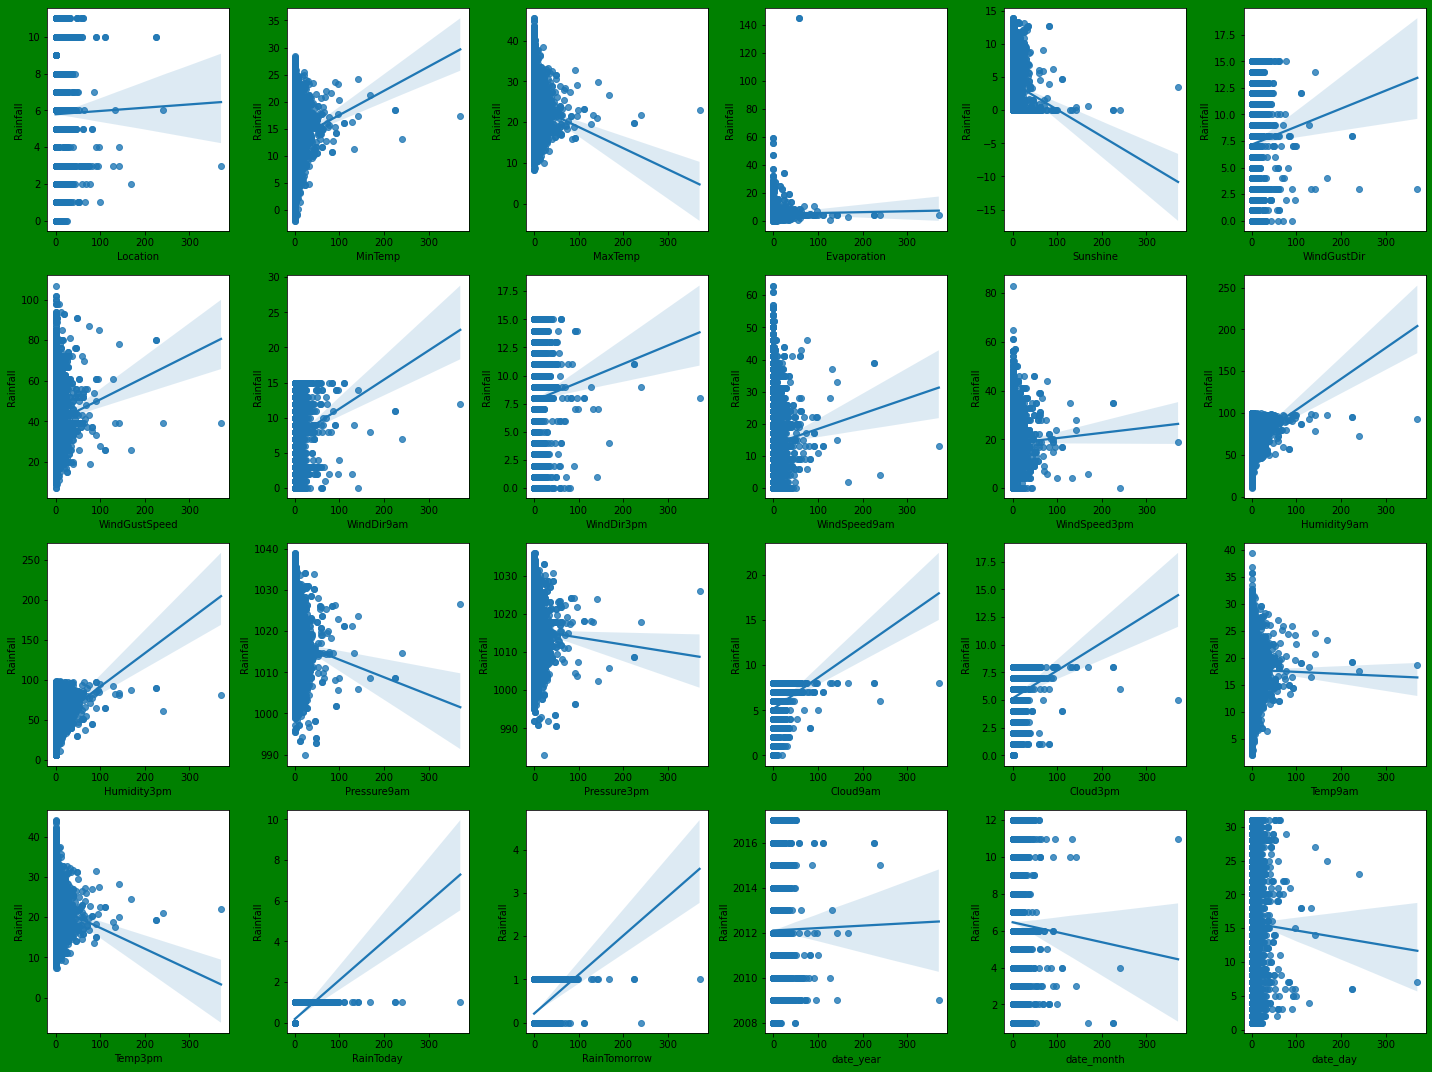

In [390]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=24:
        ax=plt.subplot(4,6,plotnumber)
        sns.regplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Rainfall',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

In [391]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [392]:
x_scaled.shape[1]

24

In [393]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns

vif

VIF       Features
0    1.561596       Location
1    8.361685        MinTemp
2   25.973164        MaxTemp
3    1.208311    Evaporation
4    2.225672       Sunshine
5    1.632956    WindGustDir
6    2.577729  WindGustSpeed
7    1.328937     WindDir9am
8    1.492198     WindDir3pm
9    2.210619   WindSpeed9am
10   2.002246   WindSpeed3pm
11   3.966855    Humidity9am
12   5.825450    Humidity3pm
13   8.985645    Pressure9am
14   8.905141    Pressure3pm
15   2.156569       Cloud9am
16   1.909580       Cloud3pm
17  17.515883        Temp9am
18  33.113811        Temp3pm
19   1.385553      RainToday
20   1.430940   RainTomorrow
21   1.697463      date_year
22   1.154624     date_month
23   1.004466       date_day

Now as the label or the target variable is a continuous data so this is a regression problem. We will be building some regression algorithms for this problem and we will find out the best machine learning model among them.

# Building Machine Learning Models and choosing the best one among them

In [394]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=488)
y_train.head()


4935     0.0
5146     0.0
8150     0.0
2256    11.4
3093     1.4
Name: Rainfall, dtype: float64

In [395]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [397]:
regression=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
svr=SVR()

In [398]:
models = [regression, knn, svr, rf]
for m in models:
    print (m)
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print(y_pred)
    print ('adjusted R2 score for training data------',m.score(x_train, y_train))
    print ('adjusted R2 score for testing data------',m.score(x_test, y_test))
    print ("mean absolute error------",mean_absolute_error(y_test,y_pred))
    print ("mean squared error------",mean_squared_error(y_test,y_pred))
    print ("root mean squared error------",np.sqrt(mean_squared_error(y_test,y_pred)))

LinearRegression()
[-0.4319562  -0.8980234   0.81877019 ... -2.0096705   0.15391354
 -0.35655731]
adjusted R2 score for training data------ 0.23209315126925
adjusted R2 score for testing data------ 0.2770478387130525
mean absolute error------ 3.0047285541452253
mean squared error------ 55.89209906912313
root mean squared error------ 7.4761018632120795
KNeighborsRegressor()
[0.24 0.   0.4  ... 0.   0.22 0.08]
adjusted R2 score for training data------ 0.4883708987650951
adjusted R2 score for testing data------ 0.17058768558694737
mean absolute error------ 2.2317702895111533
mean squared error------ 64.12263179876601
root mean squared error------ 8.007660819413246
SVR()
[-0.01571478 -0.02217269  0.05922548 ... -0.03786206  0.06952007
  0.07709916]
adjusted R2 score for training data------ 0.17416080212820284
adjusted R2 score for testing data------ 0.2057010508990864
mean absolute error------ 1.8097090926276977
mean squared error------ 61.40798510736837
root mean squared error------ 7.836

After analysing all the models we have concluded that RandomForestRegressor() model gives the best R2 score and based on the R2 score we have chosen RandomForestRegressor() as the best model. We will use RandomForestRegressor() model for further analysis.

In [399]:
#cross validation

from sklearn.model_selection import cross_val_score
cross_val_score(rf,x_scaled,y,cv=10)

array([ 0.22953934,  0.18116911,  0.15524305,  0.80127797,  0.90485501,
        0.88277002,  0.81388456,  0.33016462, -0.23247961,  0.65504207])

In [401]:
cross_val_score(RandomForestRegressor(),x_scaled,y,cv=5).mean()

0.42684659556280086

# Hyperparameter Tuning of RandomForestRegressor() model using GridSearchCV

In [405]:
rf=RandomForestRegressor(max_features='sqrt', min_samples_leaf=1,min_samples_split=2,n_estimators=17)

In [406]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=17)

In [411]:
y_pred=rf.predict(x_test)
y_pred

array([0.15882353, 0.        , 0.06470588, ..., 0.        , 0.09411765,
       0.04705882])

In [412]:
rf.score(x_test, y_test)


0.46995664526269065

In [413]:
rf.score(x_train,y_train)

0.932167163114394

The adjusted r2 score has increased after using hyperparameter tuning

In [414]:
data.tail()

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
8420         9      2.8  23.400000       0.0          4.0       0.0   
8421         9      3.6  25.300000       0.0          4.0       0.0   
8422         9      5.4  26.900000       0.0          4.0       0.0   
8423         9      7.8  27.000000       0.0          4.0       0.0   
8424         9     14.9  23.859976       0.0          4.0       0.0   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
8420            0           31.0           9           1          13.0   
8421            6           22.0           9           3          13.0   
8422            3           37.0           9          14           9.0   
8423            9           28.0          10           3          13.0   
8424            3           39.0           2           2          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
8420       7.0       7.0     10.1     22.4          0             0   
8421       7.0       7.0     10.9     24.5          0             0   
8422       7.0       7.0     12.5     26.1          0             0   
8423       3.0       2.0     15.1     26.0          0             0   
8424       8.0       8.0     15.0     20.9          0             0   

      date_year  date_month  date_day  
8420       2017           6        21  
8421       2017           6        22  
8422       2017           6        23  
8423       2017           6        24  
8424       2017           6        25

In [415]:
#prediction of amount of rainfall recorded 
print(' amount of rainfall recorded  ', rf.predict(scalar.transform([[9,2.8,23.400000,4.0,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0,2017,6,21]])))

 amount of rainfall recorded   [0.01176471]


In [416]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle12'
pickle.dump(rf,open('finalized_model.pickle12','wb'))